In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset

In [2]:
aisles = pd.read_csv('./src/aisles.csv')
departments = pd.read_csv('./src/departments.csv')
order_products_prior = pd.read_csv('./src/order_products__prior.csv')
order_products_train = pd.read_csv('./src/order_products__train.csv')
orders = pd.read_csv('./src/orders.csv')
products = pd.read_csv('./src/products.csv')

In [3]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [6]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [7]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [8]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


Calculating number of null values

In [9]:
total=orders.isnull().sum()
percentage_missing=total/orders.isnull().count()
percentage_missing

order_id                  0.000000
user_id                   0.000000
eval_set                  0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    0.060276
dtype: float64

In [10]:
count=orders['eval_set'].value_counts()
count

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

# Data Exploration and Initial Visualization

Text(0.5, 1.0, 'Orders Dataset Evaluation Set Frequency')

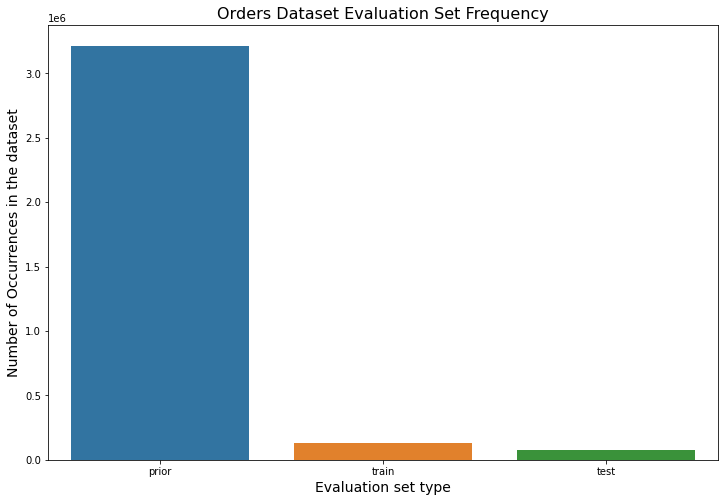

In [11]:
plt.figure(figsize=(12,8))
sns.barplot(count.index, count.values)
plt.ylabel('Number of Occurrences in the dataset', fontsize=14)
plt.xlabel('Evaluation set type', fontsize=14)
plt.title('Orders Dataset Evaluation Set Frequency', fontsize=16)

Plot of Order Frequency based on Hour of Day

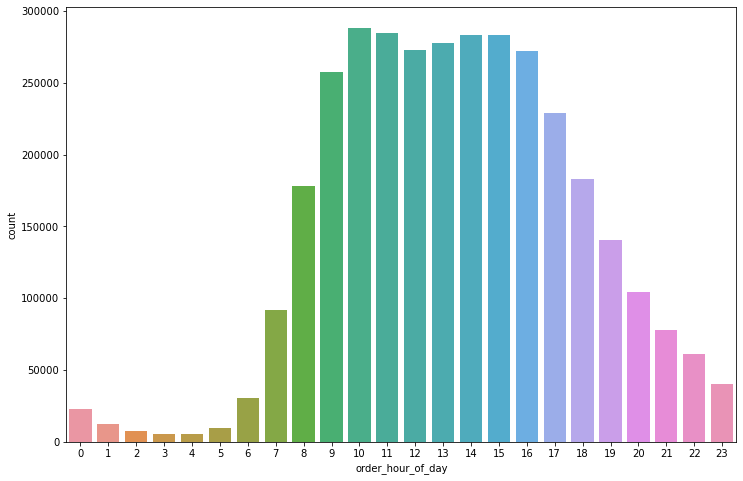

In [12]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="order_hour_of_day", data=orders)

Plot of Order Frequency based on Day of Week

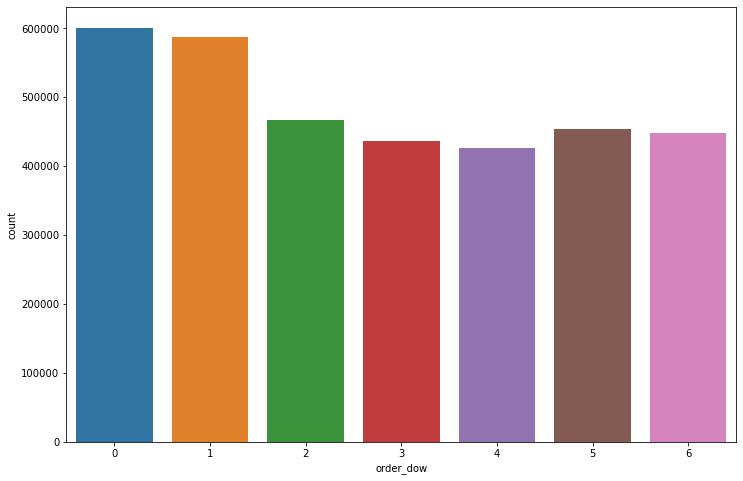

In [13]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="order_dow", data=orders)

Plot of Order Frequency per Hour of Day for each Day of Week

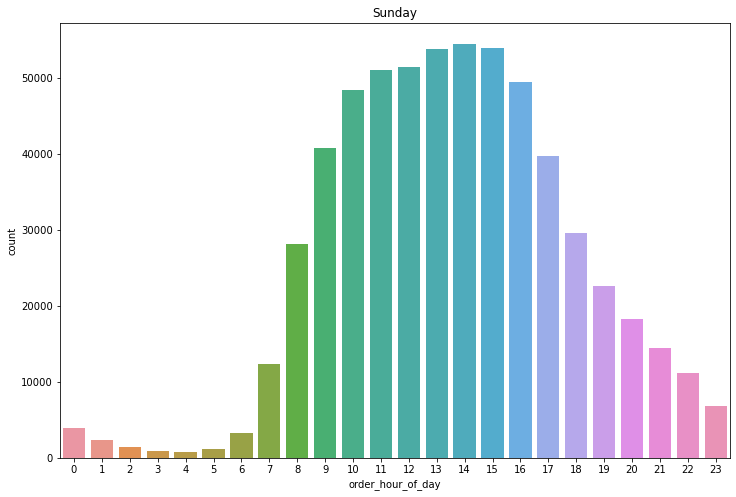

In [14]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders[orders['order_dow']==0]).set_title("Sunday")

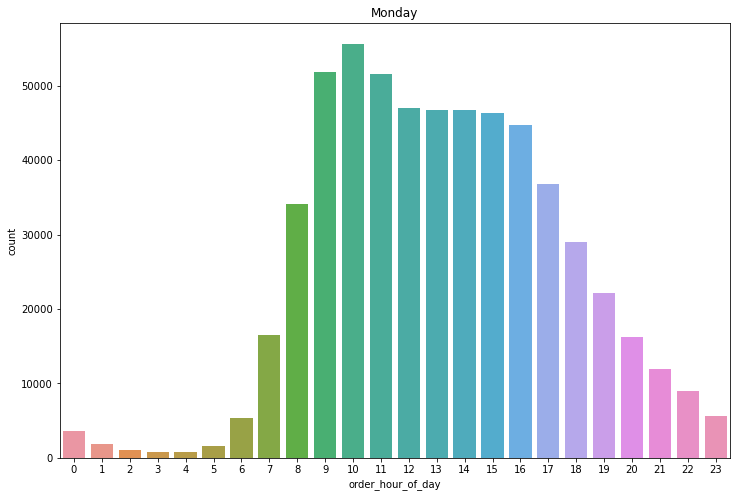

In [15]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders[orders['order_dow']==1]).set_title("Monday")

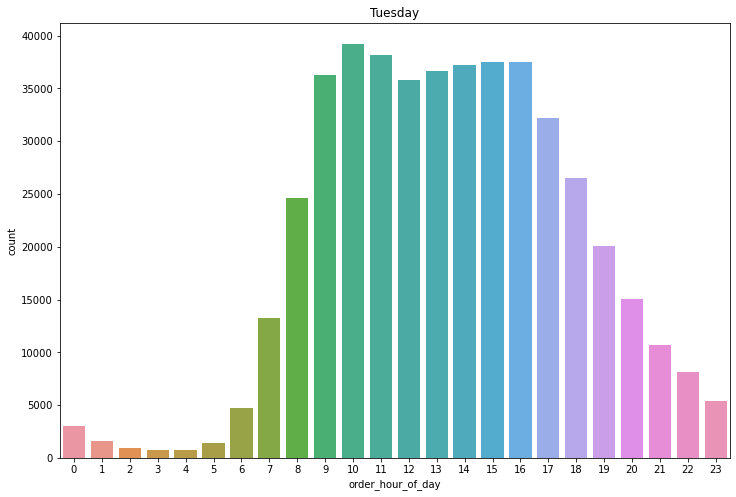

In [16]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders[orders['order_dow']==2]).set_title("Tuesday")

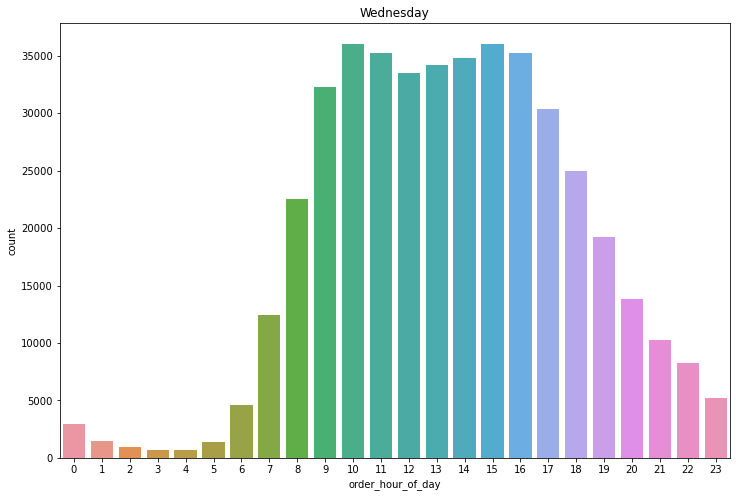

In [17]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders[orders['order_dow']==3]).set_title("Wednesday")

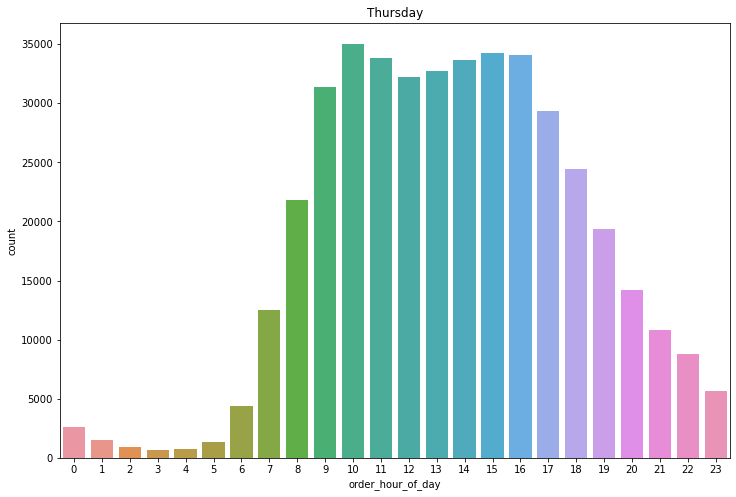

In [18]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders[orders['order_dow']==4]).set_title("Thursday")

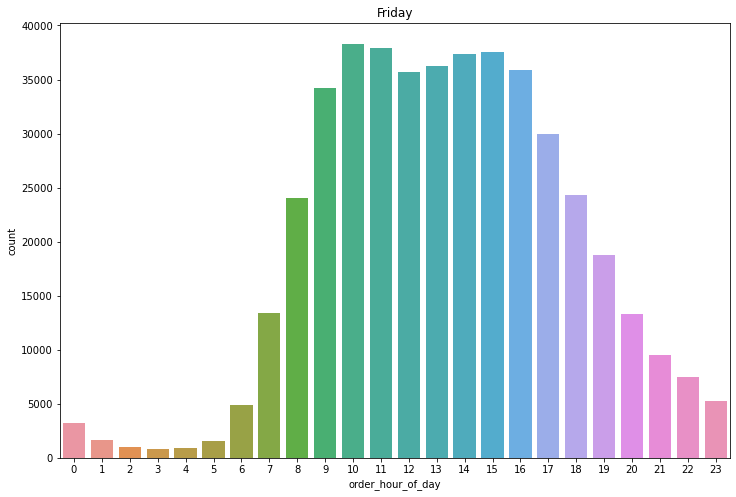

In [19]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders[orders['order_dow']==5]).set_title("Friday")

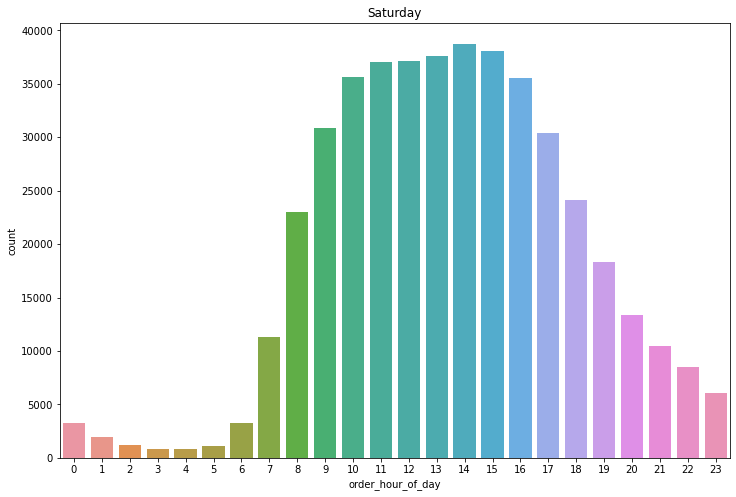

In [20]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders[orders['order_dow']==6]).set_title("Saturday")

Preparing data for heatmap

In [21]:
grouped_orders = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_orders.head()

,order_dow,order_hour_of_day,order_number
0,0,0,3936
1,0,1,2398
2,0,2,1409
3,0,3,963
4,0,4,813


In [22]:
grouped_orders = grouped_orders.pivot('order_dow', 'order_hour_of_day', 'order_number')
grouped_orders.head()

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645


Heatmap of Order day of week vs hour of day

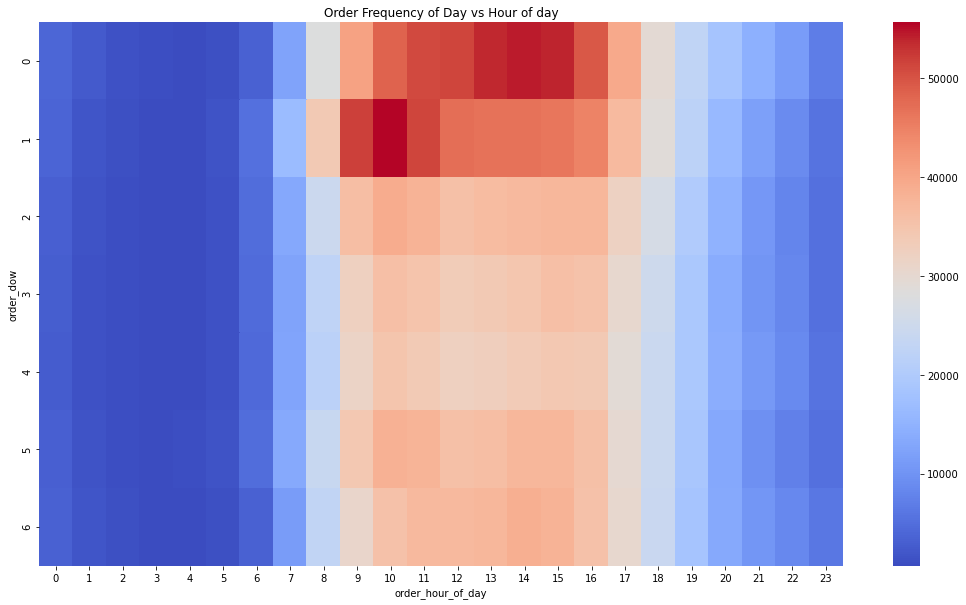

In [23]:
plt.figure(figsize=(18,10))
sns.heatmap(grouped_orders,cmap='coolwarm')
plt.title("Order Frequency of Day vs Hour of day")
plt.show()

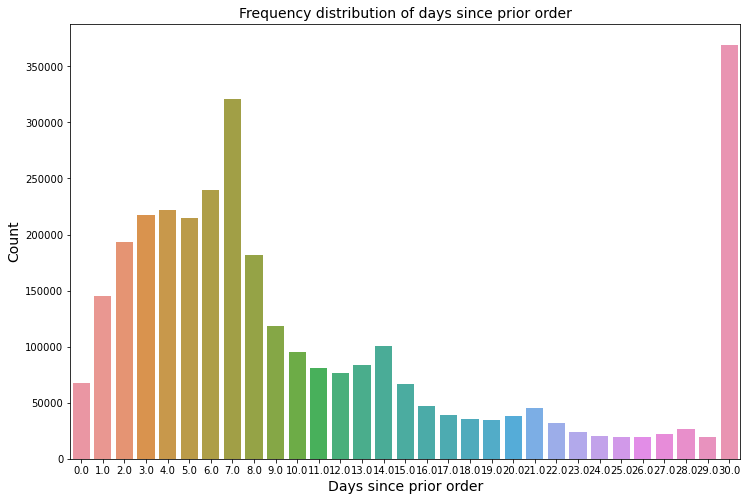

In [24]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Days since prior order', fontsize=14)
plt.title("Frequency distribution of days since prior order", fontsize=14)
plt.show()

Calculating frequency of re-orders

In [25]:
prior_sum = order_products_prior.reordered.sum() / len(order_products_prior)
train_sum = order_products_train.reordered.sum() / len(order_products_train)
prior_sum, train_sum

(0.5896974667922161, 0.5985944127509629)

Full heatmap view if needed

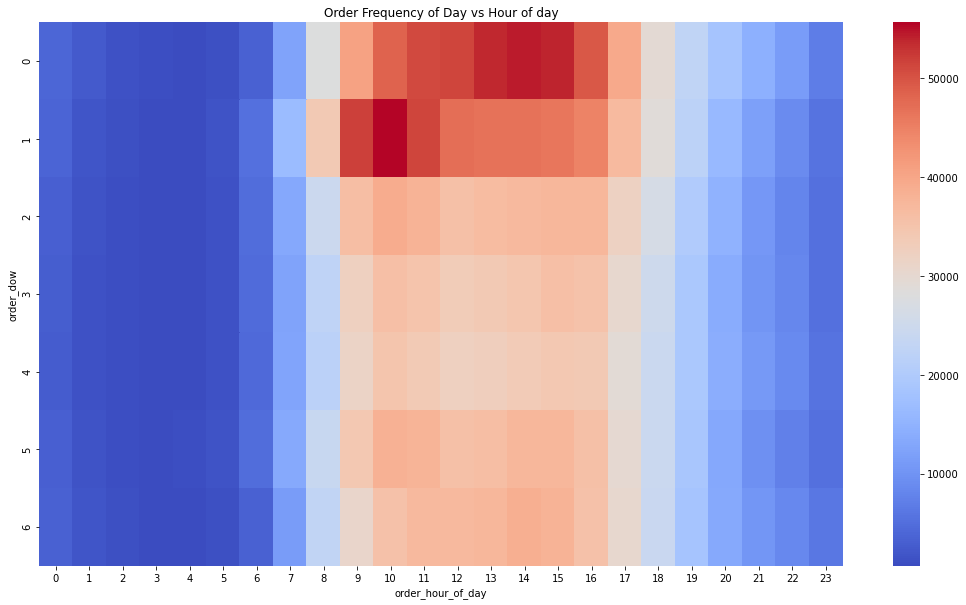

In [27]:
plt.figure(figsize=(18,10))
sns.heatmap(grouped_orders,cmap='coolwarm')
plt.title("Order Frequency of Day vs Hour of day")
plt.show()